Objective: Create a classification model to predict if a patient is likely to be readmitted into the hospital within 30 days.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\halo1\OneDrive\Documents\Python Data\dataset_diabetes\diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Female,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Female,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<h1> Overview </h1>

<h1> Data Exploraion(EDA)</h1>

In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017630e+05,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,1.651934e+08,5.432956e+07,2.024026,3.715702,5.754400,4.395949,43.095821,1.339721,16.021992,0.369358,0.197842,0.635575,7.422521
std,1.026307e+08,3.869498e+07,1.445417,5.280229,4.064135,2.985077,19.674401,1.705818,8.127539,1.267281,0.930485,1.262878,1.933537
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.495975e+07,2.341296e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523824e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302626e+08,8.754571e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438478e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


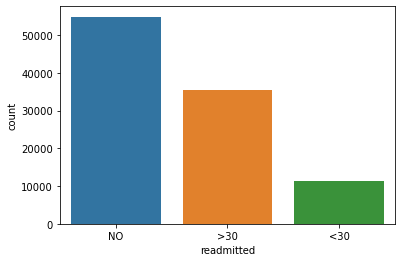

In [5]:
sns.countplot(x='readmitted', data=df);

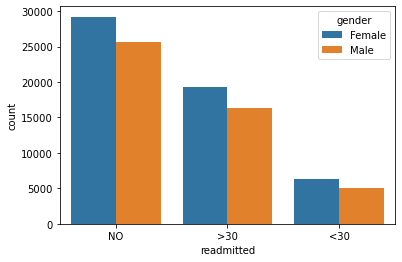

In [6]:
sns.countplot(x='readmitted', hue='gender', data=df);

<h1> Data Preparation(Wrangling, Cleaning) </h1>  
  
Looks like some gender and race data is missing...

In [7]:
print(df.columns.tolist())

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [8]:
#df.replace('?', np.NaN, inplace = True)

In [9]:
#df.isnull().any()

In [10]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98566
payer_code 40255
medical_specialty 49947
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [11]:
#missing too many records or insignificant so I'm dropping them
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'race',
             'diag_1', 'diag_2', 'diag_3', 'acetohexamide', 'chlorpropamide',
             'acarbose', 'miglitol', 'max_glu_serum', 'repaglinide', 'nateglinide', 'glimepiride',
             'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin',
             'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
             'metformin-pioglitazone', 'admission_source_id'], axis = 1)

In [12]:
df.replace('?', np.NaN, inplace = True)

df.dropna(inplace = True)

In [13]:
df.isnull().any()

encounter_id                False
patient_nbr                 False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
number_diagnoses            False
A1Cresult                   False
metformin                   False
glipizide                   False
glyburide                   False
pioglitazone                False
rosiglitazone               False
insulin                     False
change                      False
diabetesMed                 False
readmitted                  False
dtype: bool

In [14]:
df['readmitted'] = df['readmitted'].map({'NO': 0,'<30': 1, '>30' : 0}).astype(float)

In [15]:
df['readmitted'].value_counts()

0.0    90406
1.0    11357
Name: readmitted, dtype: int64

0 = Not Readmitted  
1 = < 30 days before readmission  
0 = > 30 days before readmission

In [16]:
#dealing with multiple encounters. 

df = df.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [17]:
df = df.drop(['encounter_id', 'patient_nbr'], axis = 1)

In [18]:
df['age'] = df['age'].map({'[0-10)' : 0 , '[10-20)' : 0, '[20-30)' : 0, '[30-40)' : 0, '[40-50)': 0 , 
                           '[50-60)': 0, '[60-70)' : 1, '[70-80)' : 1, '[80-90)': 2, '[90-100)' : 2
                          }).astype(float)
df['gender'] = df['gender'].astype('category')

In [19]:
df = df.drop(['A1Cresult', 'metformin', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
             'insulin', 'change', 'diabetesMed'], axis = 1)

In [20]:
df.head()

,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,Female,0.0,6,25,1,41,0,1,0,0,0,1,0.0
1,Female,0.0,1,1,3,59,0,18,0,0,0,9,0.0
2,Female,0.0,1,1,2,11,5,13,2,0,1,6,0.0
3,Female,0.0,1,1,2,44,1,16,0,0,0,7,0.0
4,Female,0.0,1,1,1,51,0,8,0,0,0,5,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71517 entries, 0 to 101758
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    71517 non-null  category
 1   age                       71517 non-null  float64 
 2   admission_type_id         71517 non-null  int64   
 3   discharge_disposition_id  71517 non-null  int64   
 4   time_in_hospital          71517 non-null  int64   
 5   num_lab_procedures        71517 non-null  int64   
 6   num_procedures            71517 non-null  int64   
 7   num_medications           71517 non-null  int64   
 8   number_outpatient         71517 non-null  int64   
 9   number_emergency          71517 non-null  int64   
 10  number_inpatient          71517 non-null  int64   
 11  number_diagnoses          71517 non-null  int64   
 12  readmitted                71517 non-null  float64 
dtypes: category(1), float64(2), int64(10)
memory 

In [22]:
#dummy variables
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

<h1> Build Models </h1>

In [23]:
from sklearn.model_selection import train_test_split

<h3> Logistic Regression 

In [24]:
import statsmodels.api as sm

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('readmitted', axis = 1),df['readmitted'], 
                                                    test_size=0.20, random_state=0)
logit = sm.Logit(Y_train, X_train)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.307855
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                57213
Model:                          Logit   Df Residuals:                    57201
Method:                           MLE   Df Model:                           11
Date:                Mon, 24 Jan 2022   Pseudo R-squ.:                -0.04001
Time:                        00:09:38   Log-Likelihood:                -17613.
converged:                       True   LL-Null:                       -16936.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0156      0.021      0.755      0.450      -0.025

In [26]:
prediction_1 = result.predict(X_test)
print(prediction_1)

54358     0.389863
23838     0.066631
8389      0.229577
48489     0.122620
100674    0.066454
            ...   
61791     0.042786
43951     0.092730
52722     0.126389
59160     0.048853
18821     0.193725
Length: 14304, dtype: float64


<h3> Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
df_list = list(df.columns)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 50)

rf.fit(X_train, Y_train);

In [31]:
prediction_2 = rf.predict(X_test)

errors = abs(prediction_2 - Y_test)

In [32]:
#Estimate is only off by 0.17
errors.mean()

0.1740982299046108

<h1> Evaluate Models </h1>

In [33]:
from sklearn.metrics import roc_curve

In [36]:
fpr1, tpr1, thresh1 = roc_curve(Y_test, prediction_1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, prediction_2, pos_label=1)


random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

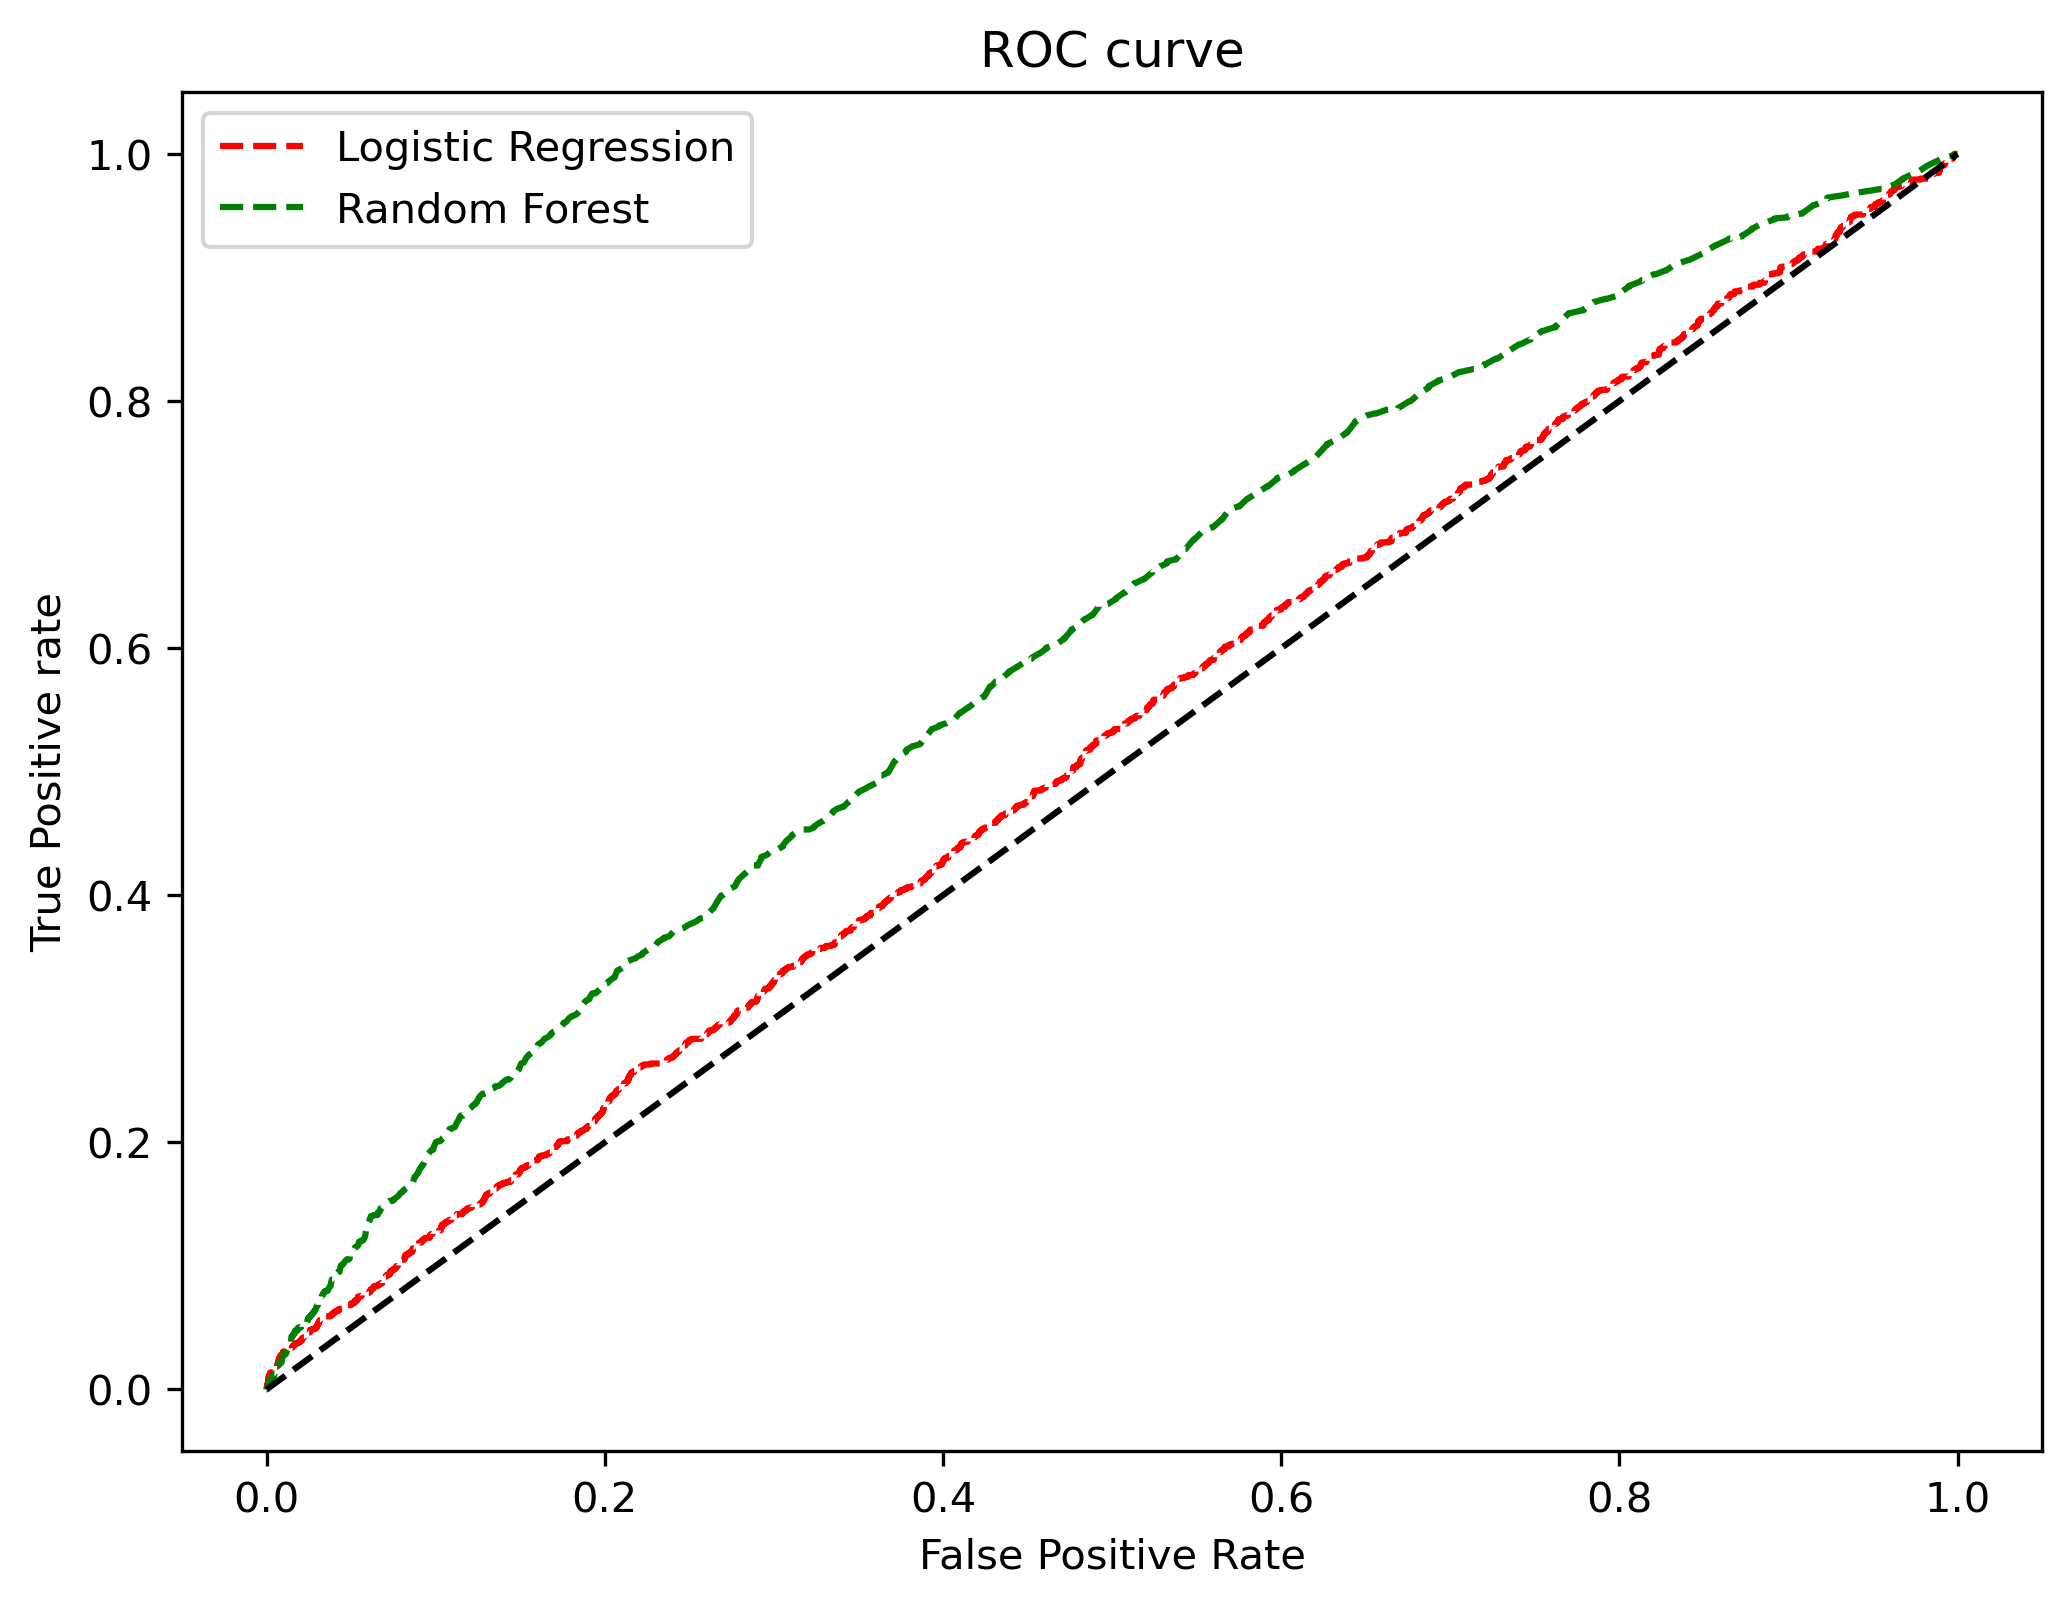

In [37]:
figure(figsize=(8, 6), dpi=300)
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();

So, I created an ROC curve to evaluate which model is actually better. According to this graph the Random Forest actually did better. This is because the area under the curve is higher than the area under the curve for the Logistic Regression.

<h1> Select Models 

So, out of the two models that I created, the Random Forest performed the best. The average error for this model was only 0.174. 